Importing the libraries for the modeling

In [26]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix


In [27]:
#loading the dataset
df_eda=pickle.load(open('C:\\Users\\Dell\\Desktop\\Vehicle Insurance Dataset\\model\\ExploratoryDataAnalysis.pkl', 'rb'))
df_eda.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [28]:
df_eda.isnull().sum().sum()

0

In [29]:
#independent and dependent variables
X=df_eda.drop(columns=['Response'],axis=1)
y=df_eda['Response']

In [30]:
#spilting the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [31]:
#shape of the train and test data
X_train.shape,X_test.shape,y_train.shape

((259552, 11), (111237, 11), (259552,))

In [32]:
#standardizing data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train)
X_test=scaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test)

Building a Logistic Regression mode

In [33]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train) #building a algorithm
print('performance of the traing data',log_reg.score(X_train,y_train))
y_pred_test_log=log_reg.predict(X_test)
print(classification_report(y_test,y_pred_test_log))

performance of the traing data 0.8779782086055974
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     97751
           1       0.00      0.00      0.00     13486

    accuracy                           0.88    111237
   macro avg       0.44      0.50      0.47    111237
weighted avg       0.77      0.88      0.82    111237



[[97749     2]
 [13486     0]]


<AxesSubplot:>

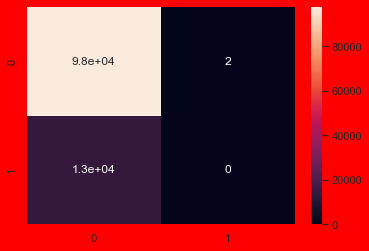

In [34]:
print(confusion_matrix(y_test,y_pred_test_log))
import seaborn as sns
sns.set(rc={'figure.facecolor':'red'})
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),annot=True)

Building a KNN Classifier model

Building a Decision Tree Classifier model

In [35]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('performance of the training data',dtc.score(X_train,y_train))
y_pred_dtc_test=dtc.predict(X_test)
print(classification_report(y_test,y_pred_dtc_test))

performance of the training data 0.9999075329799039
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     97751
           1       0.29      0.30      0.29     13486

    accuracy                           0.82    111237
   macro avg       0.59      0.60      0.60    111237
weighted avg       0.83      0.82      0.83    111237



[[87487 10264]
 [ 9386  4100]]


<AxesSubplot:>

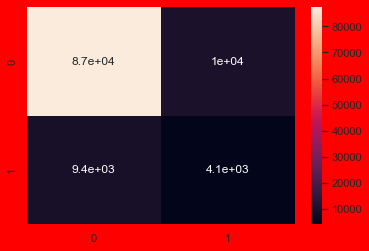

In [36]:
print(confusion_matrix(y_test,y_pred_dtc_test))
sns.heatmap(confusion_matrix(y_test,y_pred_dtc_test),annot=True)

Building a Random Forest Classifier model

In [37]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
print('performance of the training data',rfc.score(X_train,y_train))
y_pred_rfc_test=rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc_test))

performance of the training data 0.9999036801873998
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     97751
           1       0.35      0.12      0.18     13486

    accuracy                           0.87    111237
   macro avg       0.62      0.54      0.55    111237
weighted avg       0.82      0.87      0.84    111237



[[94867  2884]
 [11904  1582]]


<AxesSubplot:>

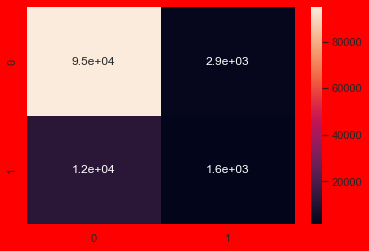

In [38]:
print(confusion_matrix(y_test,y_pred_rfc_test))
sns.heatmap(confusion_matrix(y_test,y_pred_rfc_test),annot=True)

Evaluation Matrix Base Model (All)

In [39]:
prec_test_LR = precision_score(y_test, y_pred_test_log)
prec_test_DTC = precision_score(y_test, y_pred_dtc_test)
prec_test_RF = precision_score(y_test, y_pred_rfc_test)
rec_test_LR = recall_score(y_test, y_pred_test_log)
rec_test_DTC = recall_score(y_test, y_pred_dtc_test)
rec_test_RF = recall_score(y_test, y_pred_rfc_test)
EM = {
      'Precision_Test':[prec_test_LR, prec_test_DTC, prec_test_RF],
      'Recall_Test':[rec_test_LR, rec_test_DTC, rec_test_RF]
}
mod_base = pd.DataFrame(data=EM, index=['LogReg','DTC','RF_Clas']).round(2)
mod_base

,Precision_Test,Recall_Test
LogReg,0.00,0.00
DTC,0.29,0.30
RF_Clas,0.35,0.12


Data Improvement

As we know the target variable data are imbalanced, so we will try to do data improvement with Random Over Sampling and Random Under Sampling

In [40]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.dropna()

,0,1,2,3,4,5,6,7,8,9,10,Response
0,-0.562032,0.044934,0.118010,1.085516,-0.057017,0.730568,-0.315536,-1.082674,1.138075,-0.205431,-1.006944,1.0
1,0.474032,0.044934,-1.761117,-0.921221,0.238916,-1.601813,0.711763,0.923639,-0.878677,-0.205431,0.993104,0.0
2,-0.044000,0.044934,-1.761117,-0.921221,-0.268164,0.212261,-1.091983,0.923639,-0.878677,-0.205431,0.993104,1.0
4,0.538786,0.044934,0.118010,1.085516,1.197796,-1.601813,0.210059,-1.082674,-0.878677,-0.205431,-1.006944,0.0
5,-0.756293,0.044934,-0.408146,1.085516,-1.807175,0.730568,-1.199491,0.923639,1.138075,-0.205431,-1.006944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259547,-0.691539,0.044934,1.245486,1.085516,-0.197488,0.730568,-0.614169,-1.082674,1.138075,-0.205431,-1.006944,0.0
259548,-0.626786,0.044934,0.719331,1.085516,0.276017,0.730568,-1.414507,-1.082674,1.138075,-0.205431,-1.006944,0.0
259549,-0.238262,0.044934,-0.483311,-0.921221,-1.807175,0.804612,0.974561,-1.082674,-0.878677,-0.205431,0.993104,0.0
259550,-0.885801,0.044934,0.268340,1.085516,-1.807175,0.730568,0.652037,-1.082674,1.138075,-0.205431,-1.006944,1.0


In [41]:
df_train['Response'].value_counts()

0.0    227883
1.0     31669
Name: Response, dtype: int64

Random Over Sampling method

In [42]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
random_os=RandomOverSampler(random_state=0)
smote_os=SMOTETomek()
X_os,y_os=random_os.fit_resample(X,y)
smote_os=smote_os.fit_resample(X,y)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)
X_train_os.shape,X_test_os.shape,y_train_os.shape

((455887, 11), (195381, 11), (455887,))

In [43]:
#### LogReg Model Base + Random Over Sampling
os_LR = LogisticRegression()
os_LR.fit(X_train_os, y_train_os)
y_os_LR = os_LR.predict(X_test_os)
print(classification_report(y_test_os, y_os_LR)) ## test data

              precision    recall  f1-score   support

           0       0.95      0.60      0.74     97600
           1       0.71      0.97      0.82     97781

    accuracy                           0.78    195381
   macro avg       0.83      0.78      0.78    195381
weighted avg       0.83      0.78      0.78    195381



In [44]:
cm_LR = confusion_matrix(y_test_os, y_os_LR, labels=[1 , 0])
print(cm_LR)

[[94915  2866]
 [39214 58386]]


In [45]:
os_RF = RandomForestClassifier()
os_RF.fit(X_train_os, y_train_os)
y_os_RF = os_RF.predict(X_test_os)
print(classification_report(y_test_os, y_os_RF)) ## test data

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     97600
           1       0.90      1.00      0.94     97781

    accuracy                           0.94    195381
   macro avg       0.95      0.94      0.94    195381
weighted avg       0.95      0.94      0.94    195381



In [46]:
cm_LR = confusion_matrix(y_test_os, y_os_RF, labels=[1 , 0])

In [47]:
prec_test_LR = precision_score(y_test_os, y_os_LR)
#prec_test_KNN = precision_score(y_test, y_os_KNN)
prec_test_RF = precision_score(y_test_os, y_os_RF)
rec_test_LR = recall_score(y_test_os, y_os_LR)
#rec_test_KNN = recall_score(y_test, y_os_KNN)
rec_test_RF = recall_score(y_test_os, y_os_RF)
EM = {'Precision_Test':[prec_test_LR, prec_test_RF],
'Recall_Test':[rec_test_LR, rec_test_RF]}
EM_OS = pd.DataFrame(data=EM, index=['LogReg_OS','RF_Clas_OS']).round(2)

In [48]:
#dumping the data into pickle file
with open('C:\\Users\\Dell\\Desktop\\Vehicle Insurance Dataset\\model\\train_model.pkl', 'wb') as f:
    pickle.dump(EM_OS,f)